<a href="https://colab.research.google.com/github/melikaminari/DataJournalism/blob/main/2023_text_analysis_newsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns


In [27]:
!python -m spacy download el_core_news_sm

2023-07-12 12:47:47.451549: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 119.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [28]:
newsit_full_articles_df = pd.read_csv('/content/drive/MyDrive/1o scraper.ipynb.csv')
newsit_full_articles_df

site                                                url  \
0   https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/samos-s...   
1   https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/aktoplo...   
2   https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/tinos-o...   
3   https://www.newsit.gr/  https://www.newsit.gr/ellada/ayksimeni-i-touri...   
4   https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/tourism...   
..                     ...                                                ...   
95  https://www.newsit.gr/  https://www.newsit.gr/politikh/kikilias-o-kaly...   
96  https://www.newsit.gr/  https://www.newsit.gr/politikh/kyriakos-mitsot...   
97  https://www.newsit.gr/  https://www.newsit.gr/politikh/vasilis-kikilia...   
98  https://www.newsit.gr/  https://www.newsit.gr/politikh/proypologismos-...   
99  https://www.newsit.gr/  https://www.newsit.gr/politikh/vasilis-kikilia...   

                                              section  \
0   \nNewsIT Τοπικα Νεα Το νησι - εκπληξη που βρισ...   
1   \nNewsIT Τοπικα Νεα Αυξησεις «φωτια» στα ακτοπ...   
2   \nNewsIT Τοπικα Νεα Αυτο ειναι το νησι των Κυκ...   
3   \nNewsIT Ελλαδα Αυξημενη η τουριστικη κινηση σ...   
4   \nNewsIT Τοπικα Νεα Δειτε τα ελληνικα νησια πο...   
..                                                ...   
95  \nNewsIT Πολιτικη Κικιλιας: Ο καλυτερος Οκτωβρ...   
96  \nNewsIT Πολιτικη Κυριακος Μητσοτακης για τουρ...   
97  \nNewsIT Πολιτικη Βασιλης Κικιλιας: Εστιαση κα...   
98  \nNewsIT Πολιτικη Κικιλιας: Και το 2023, ο του...   
99  \nNewsIT Πολιτικη Βασιλης Κικιλιας: «Ο Τουρισμ...   

                                                title  \
0   Σάμος: Στους πέντε κορυφαίους προορισμούς της ...   
1   Ακτοπλοϊκά εισιτήρια: Οι αυξήσεις και τα νησιά...   
2   Τήνος: Ο τουρισμός και η συνταγή της απογείωση...   
3   Αυξημένη η τουριστική κίνηση στα νησιά, «βραχν...   
4   Τουρισμός: Ποια νησιά επέλεξαν 27.000 Τούρκοι ...   
..                                                ...   
95  Κικίλιας: Ο καλύτερος Οκτώβριος όλων των εποχώ...   
96  Κυριάκος Μητσοτάκης για τουρισμό: «Είχαμε 3 δι...   
97  Βασίλης Κικίλιας: Εστίαση και καταλύματα ενισχ...   
98  Προϋπολογισμός 2023 – Κικίλιας: Και το 2023, ο...   
99  Βασίλης Κικίλιας: «Ο Τουρισμός παίρνει τα εύση...   

                         date  author  \
0   2023-07-10T09:09:03+03:00     NaN   
1   2023-07-09T20:30:07+03:00     NaN   
2   2023-07-09T13:20:41+03:00     NaN   
3   2023-07-09T09:48:30+03:00     NaN   
4   2023-07-08T16:38:30+03:00     NaN   
..                        ...     ...   
95  2022-12-21T15:39:07+02:00     NaN   
96  2022-12-20T18:27:16+02:00     NaN   
97  2022-12-20T16:51:11+02:00     NaN   
98  2022-12-16T13:20:29+02:00     NaN   
99  2022-12-09T16:56:20+02:00     NaN   

                                            full_text  
0   Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...  
1   Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...  
2   Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...  
3   «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...  
4   Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...  
..                                                ...  
95  Ο τουρισμός αποτελεί ένα σημαντικό κομμάτι της...  
96  Ο Κυριάκος Μητσοτάκης μίλησε στην εκδήλωση που...  
97  Τα στοιχεία της ΕΛΣΤΑΤ σχολίασε με ανάρτησή το...  
98  Σε πρωταγωνιστή της ανάπτυξης θα αναδειχθεί κα...  
99  «Ο Τουρισμός παίρνει τα εύσημα από την ελληνικ...  

[100 rows x 7 columns]

In [29]:
print(datetime)

<class 'datetime.datetime'>


In [30]:
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], utc=True, format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

site                                                url  \
0  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/samos-s...   
1  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/aktoplo...   
2  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/tinos-o...   
3  https://www.newsit.gr/  https://www.newsit.gr/ellada/ayksimeni-i-touri...   
4  https://www.newsit.gr/  https://www.newsit.gr/topikes-eidhseis/tourism...   

                                             section  \
0  \nNewsIT Τοπικα Νεα Το νησι - εκπληξη που βρισ...   
1  \nNewsIT Τοπικα Νεα Αυξησεις «φωτια» στα ακτοπ...   
2  \nNewsIT Τοπικα Νεα Αυτο ειναι το νησι των Κυκ...   
3  \nNewsIT Ελλαδα Αυξημενη η τουριστικη κινηση σ...   
4  \nNewsIT Τοπικα Νεα Δειτε τα ελληνικα νησια πο...   

                                               title  \
0  Σάμος: Στους πέντε κορυφαίους προορισμούς της ...   
1  Ακτοπλοϊκά εισιτήρια: Οι αυξήσεις και τα νησιά...   
2  Τήνος: Ο τουρισμός και η συνταγή της απογείωση...   
3  Αυξημένη η τουριστική κίνηση στα νησιά, «βραχν...   
4  Τουρισμός: Ποια νησιά επέλεξαν 27.000 Τούρκοι ...   

                        date  author  \
0  2023-07-10T09:09:03+03:00     NaN   
1  2023-07-09T20:30:07+03:00     NaN   
2  2023-07-09T13:20:41+03:00     NaN   
3  2023-07-09T09:48:30+03:00     NaN   
4  2023-07-08T16:38:30+03:00     NaN   

                                           full_text                  datetime  
0  Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ... 2023-07-10 06:09:03+00:00  
1  Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως... 2023-07-09 17:30:07+00:00  
2  Η Τήνος δίνει τη δική της μάχη και ο τουρισμός... 2023-07-09 10:20:41+00:00  
3  «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ... 2023-07-09 06:48:30+00:00  
4  Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ... 2023-07-08 13:38:30+00:00

In [31]:
newsit_full_articles_df.loc[0, 'date']

'2023-07-10T09:09:03+03:00'

In [32]:
original_datetime = "2023-07-09T13:20:41+03:00"
datetime = original_datetime.replace('T','').replace('+03', '').replace(':00', '')

In [33]:
newsit_short_df = newsit_full_articles_df[['datetime','full_text']]
newsit_short_df.head()

datetime                                          full_text
0 2023-07-10 06:09:03+00:00  Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...
1 2023-07-09 17:30:07+00:00  Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...
2 2023-07-09 10:20:41+00:00  Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...
3 2023-07-09 06:48:30+00:00  «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...
4 2023-07-08 13:38:30+00:00  Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...

In [34]:
newsit_short_df['year'] = pd.DatetimeIndex(newsit_short_df['datetime']).year
newsit_short_df['month'] = pd.DatetimeIndex(newsit_short_df['datetime']).month
newsit_short_df['day'] = pd.DatetimeIndex(newsit_short_df['datetime']).day
newsit_short_df['hour'] = pd.DatetimeIndex(newsit_short_df['datetime']).hour

<ipython-input-34-482f2c980068>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsit_short_df['year'] = pd.DatetimeIndex(newsit_short_df['datetime']).year
<ipython-input-34-482f2c980068>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newsit_short_df['month'] = pd.DatetimeIndex(newsit_short_df['datetime']).month
<ipython-input-34-482f2c980068>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [35]:
newsit_short_df.head()

datetime  \
0 2023-07-10 06:09:03+00:00   
1 2023-07-09 17:30:07+00:00   
2 2023-07-09 10:20:41+00:00   
3 2023-07-09 06:48:30+00:00   
4 2023-07-08 13:38:30+00:00   

                                           full_text  year  month  day  hour  
0  Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...  2023      7   10     6  
1  Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...  2023      7    9    17  
2  Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...  2023      7    9    10  
3  «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...  2023      7    9     6  
4  Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...  2023      7    8    13

<Axes: >

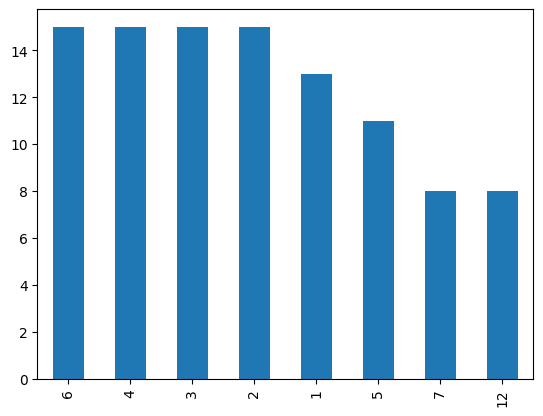

In [36]:
newsit_short_df['month'].value_counts().plot(kind='bar')

<Axes: >

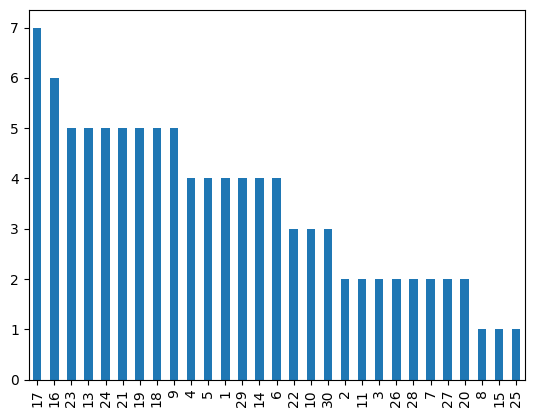

In [37]:
newsit_short_df['day'].value_counts().plot(kind='bar')

In [38]:
newsit_short_df.groupby('day')['full_text'].count().sort_values(ascending=False)

day
17    7
16    6
13    5
24    5
23    5
21    5
19    5
18    5
9     5
29    4
14    4
1     4
6     4
4     4
5     4
22    3
30    3
10    3
7     2
20    2
2     2
26    2
27    2
28    2
3     2
11    2
8     1
15    1
25    1
Name: full_text, dtype: int64

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [40]:
text = newsit_short_df['full_text'].str.cat(sep = ' ')

In [41]:
nlp = spacy.load('el_core_news_sm')

In [42]:
full_doc = nlp(text)

In [43]:
full_doc[:200]

Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τουριστών και μεγάλη ταξιδιωτική ιστοσελίδα βάζει το νησί στις 5 κορυφαίες επιλόγές για το φετινό καλοκαίρι… Στους πέντε κορυφαίους περιπατητικούς προορισμούς της Ελλάδας εντάσσεται η Σάμος, σύμφωνα με το νέο κατάλογο που ανακοίνωσε το Griekenland.net. Ο τουρισμός συνεχίζεται, οι αφίξεις στο νησί αυξάνονται και η αισιοδοξία για το επόμενο διάστημα είναι διάχυτη στο νησί.  Καταγράφοντας τις απόψεις των Ολλανδών ταξιδιωτών, η καθιερωμένη ταξιδιωτική ιστοσελίδα με εκατομμύρια επισκέπτες ανέδειξε τη Σάμο στη δεύτερη θέση σε όλη την Ελλάδα και μάλιστα ως τον κορυφαίο νησιωτικό προορισμό με κριτήριο τις περιπατητικές διαστηριότητες και τις ταξιδιωτικές εμπειρίες που προσφέρει το μαγευτικό νησί του Βορείου Αιγαίου. Προηγήθηκε ενημερωτική επαφή του Δήμου Ανατολικής Σάμου με τη δημοσιογραφική ομάδα του μέσου. «Μετά την αστάθεια που εμφάνισε η Ελλάδα τον Ιούνιο, οι προβλέψεις για τον Ιούλιο και τον Αύγουστο είναι ευοίωνες για το νησί του Πυθαγόρα.  Η 

In [44]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [45]:
lemmatized_text[:1000]

'ο σάμος πρωταγωνίζω σε ο επιλογή Ολλανδών τουριστών και μεγάλος ταξιδιωτικός ιστοσελίδα βάζω ο νησί σε ο 5 κορυφαία επιλόγή για ο φετινός καλοκαίρι … Σε ο πέντε κορυφαίους περιπατητικής προορισμός ο Ελλάδα εντάσσω ο Σάμος , σύμφωνα με ο νέος κατάλογος που ανακοινώνω ο Griekenland.net . ο τουρισμός συνεχίζω , ο αφίξεις σε ο νησί αυξάνω και ο αισιοδοξία για ο επόμενος διάστημα είμαι διάχυτη σε ο νησί .   Καταγράφοντας ο άποψη ο Ολλανδών ταξιδιωτών , ο καθιερωμένη ταξιδιωτικός ιστοσελίδα με εκατομμύριο επισκέπτης ανέδειξε ο σάμο σε ο δεύτερος θέση σε όλος ο Ελλάδα και μάλιστα ως ο κορυφαίος νησιωτικός προορισμός με κριτήριο ο περιπατητικός διαστηριότητα και ο ταξιδιωτικός εμπειρία που προσφέρω ο μαγευτικός νησί ο Βορείου Αιγαίο . Προηγήθηκε ενημερωτικός επαφή ο Δήμου Ανατολικής σάμου με ο δημοσιογραφικός ομάδα ο μέσο . « μετά ο αστάθεια που εμφάνισε ο Ελλάδα ο Ιούνιος , ο προβλέψεις για ο Ιούλιος και ο Αύγουστος είμαι ευοίωνος για ο νησί ο πυθαγόρα .   ο ζήτηση είμαι σε υψηλά επίπεδο από

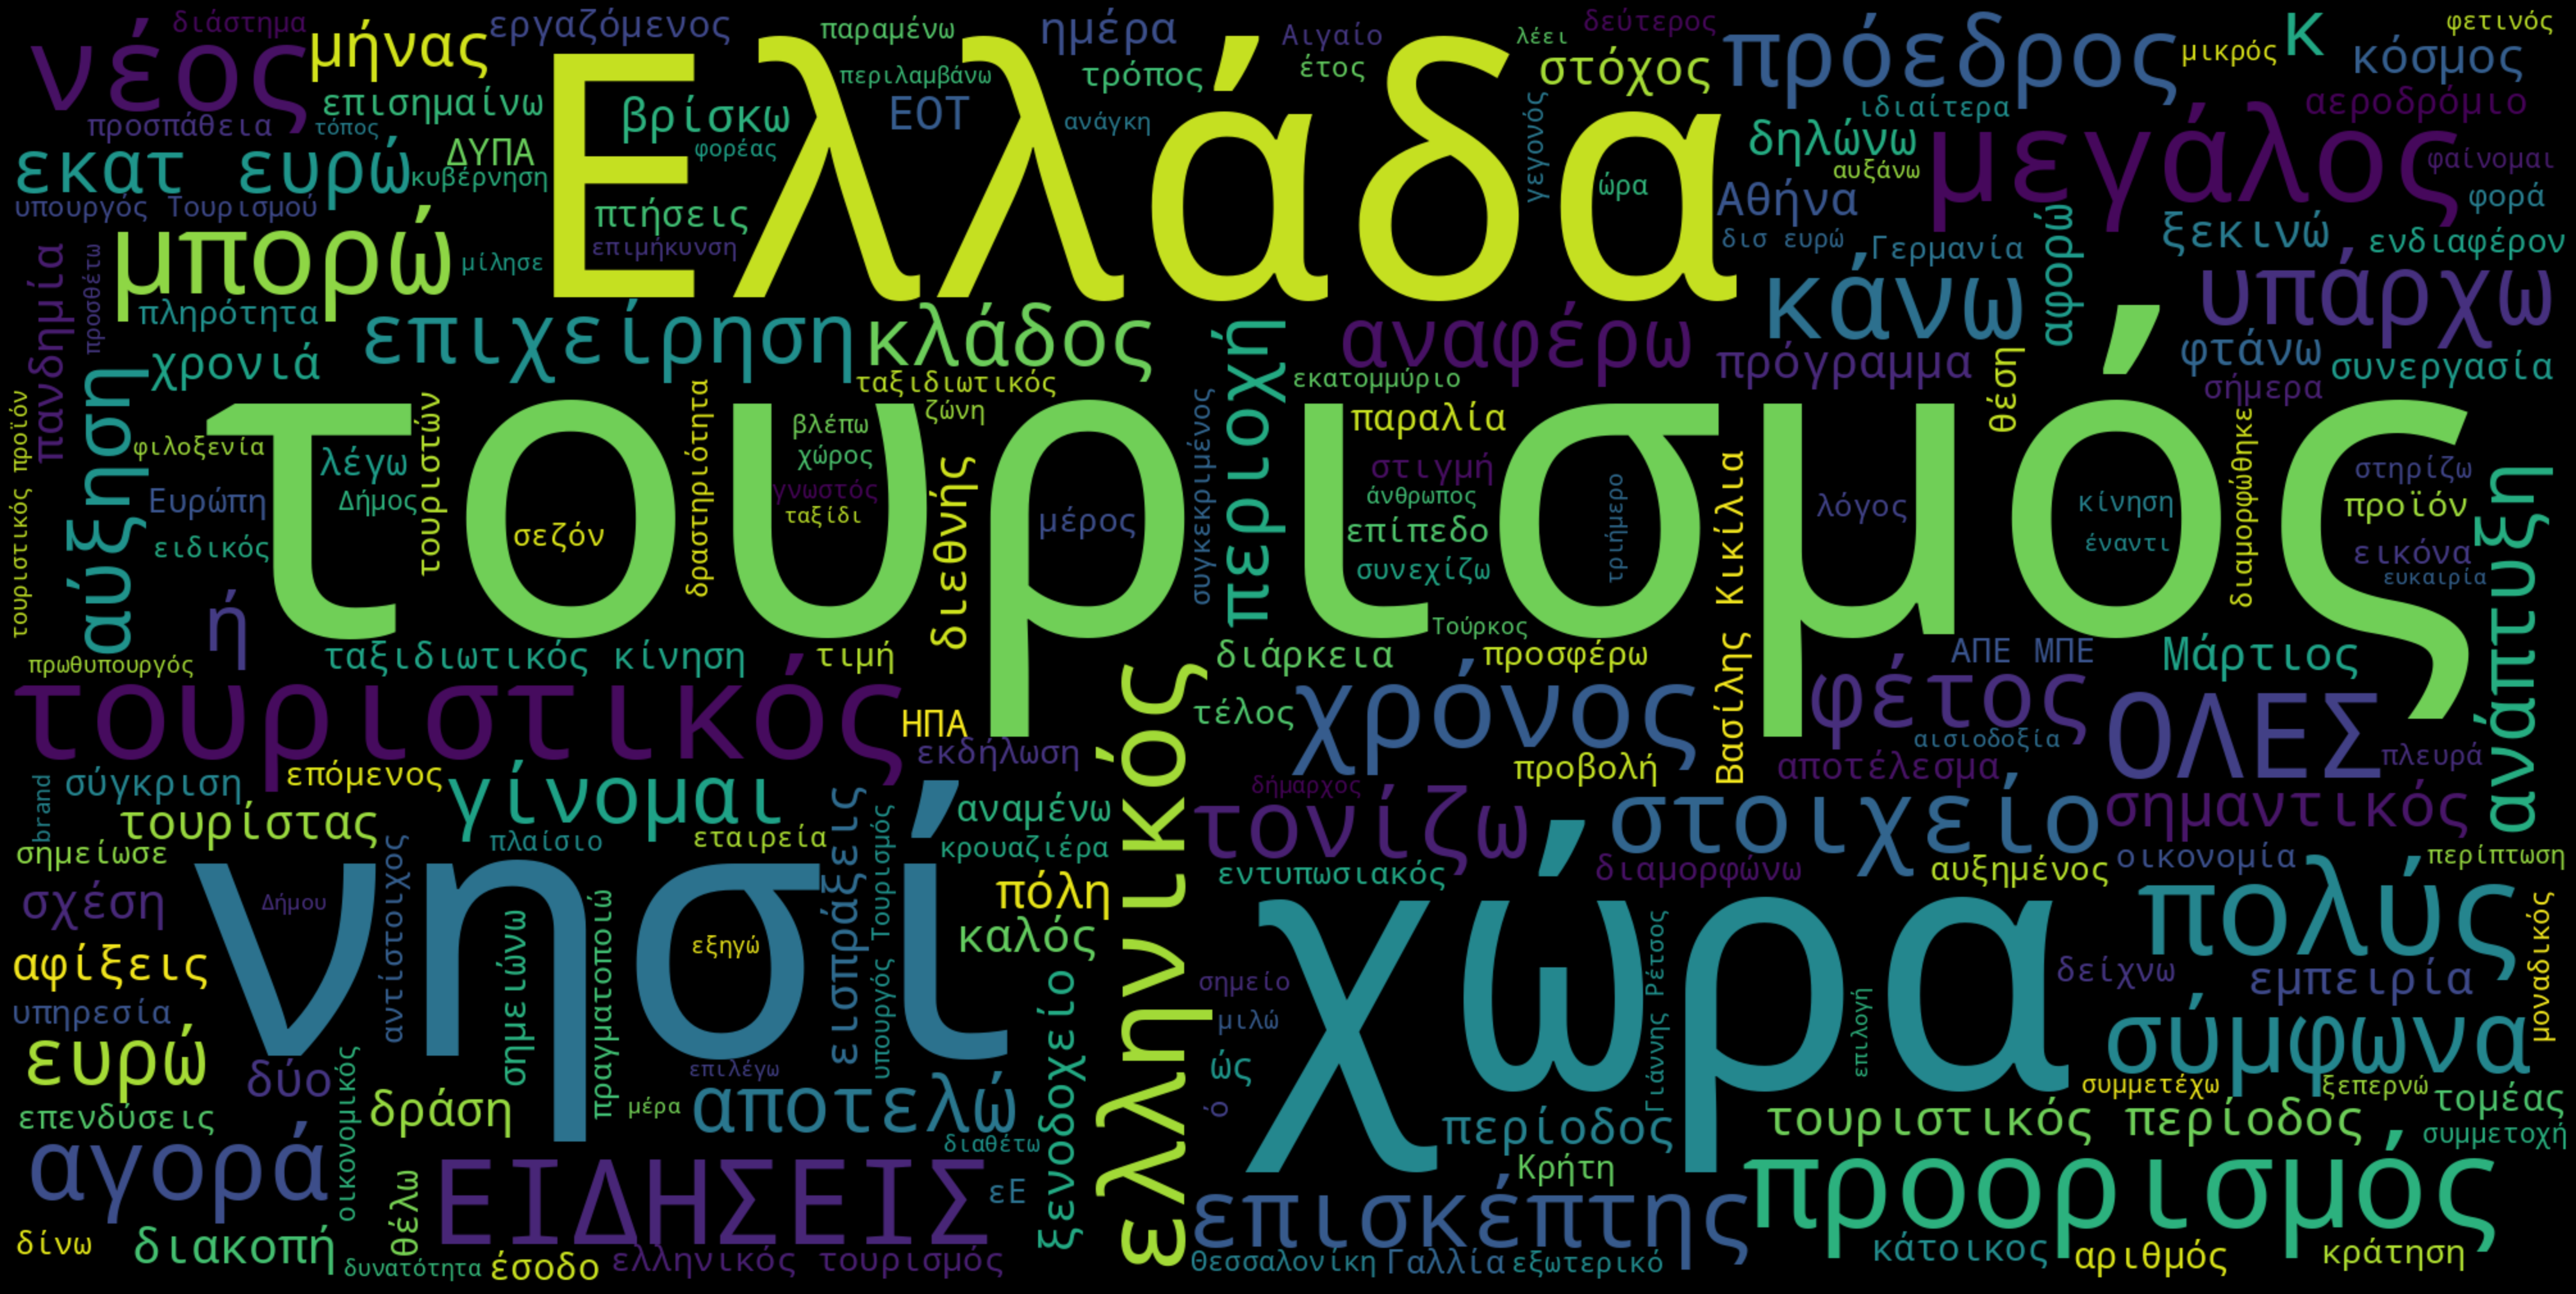

In [46]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [47]:
doc = nlp(newsit_short_df['full_text'][1])

In [48]:
for token in doc:
    print(token, token.lemma_)

Τα ο
ακτοπλοϊκά ακτοπλοϊκός
εισιτήρια εισιτήριο
είναι είμαι
« «
φωτιά φωτιά
» »
και και
όπως όπως
φαίνεται φαίνομαι
όλο όλο
και και
περισσότεροι πολύς
επέλεξαν επέλεξαν
κάποιο κάποιος
από από
τα ο
νησιά νησί
του ο
Αργοσαρωνικού Αργοσαρωνικός
για για
τις ο
καλοκαιρινές καλοκαιρινή
διακοπές διακοπή
τους μου
… …
Τα ο
ακτοπλοϊκά ακτοπλοϊκός
εισιτήρια εισιτήρια
αυξήθηκαν αυξήω
τρεις τρεις
φορές φορά
μέσα μέσα
σε σε
16 16
μήνες μήνας
και και
το ο
κόστος κόστος
για για
μια ένας
μέση μέσος
ελληνική ελληνικός
οικογένεια οικογένεια
, ,
κρίνεται κρίνομαι
σε σε
πολλές πολύς
περιπτώσεις περίπτωση
απαγορευτικό απαγορευτικός
. .
Κάτοικοι Κάτοικοι
της ο
Αθήνας Αθήνα
και και
του ο
Πειραιά πειραιά
επιλέγουν επιλέγω
κάποιο κάποιος
από από
τα ο
νησιά νησί
του ο
Αργοσαρωνικού Αργοσαρωνικός
, ,
καθώς καθώς
γι’ γι’
αυτά αυτός
το ο
κόστος κόστος
δεν δεν
ξεφεύγει ξεφεύγει
. .
Αυτό αυτός
έχει έχω
σαν σαν
αποτέλεσμα αποτέλεσμα
η ο
Αίγινα αίγινα
, ,
το ο
Αγκίστρι Αγκίστρι
και και
η ο
Ύδρα Ύδρα
να να
έχουν έχω
πλη

In [49]:
' '.join(token.lemma_ for token in doc)

'ο ακτοπλοϊκός εισιτήριο είμαι « φωτιά » και όπως φαίνομαι όλο και πολύς επέλεξαν κάποιος από ο νησί ο Αργοσαρωνικός για ο καλοκαιρινή διακοπή μου … ο ακτοπλοϊκός εισιτήρια αυξήω τρεις φορά μέσα σε 16 μήνας και ο κόστος για ένας μέσος ελληνικός οικογένεια , κρίνομαι σε πολύς περίπτωση απαγορευτικός . Κάτοικοι ο Αθήνα και ο πειραιά επιλέγω κάποιος από ο νησί ο Αργοσαρωνικός , καθώς γι’ αυτός ο κόστος δεν ξεφεύγει . αυτός έχω σαν αποτέλεσμα ο αίγινα , ο Αγκίστρι και ο Ύδρα να έχω πληρότητα σε ο ξενοδοχείο που πλησιάζω ο 100%.   με ο ακρίβεια σε ο ακτοπλοϊκός εισιτήρια να παραμένω ο μεγάλος « πληγή » ο διακοπή , αρκετός είμαι εκείνος που επιλέγω να αποδράσουν σε πιο κοντινός προορισμός από ο Αθήνα με μικρότερο κόστος . από ο λιμάνι ο Ραφήνα για ο Άνδρο , ο εισιτήριο κοστίζω 50 ευρώ ο άτομο με επιστροφή . αν κάποιος θέλω να πάρει μαζί μου ο αυτοκίνητο , σε ο τιμή θα πρέπει να προσθέω 70 ευρώ , με ο σύνολο για δύο άτομο να φτάνω σε ο 170 ευρώ .   πιο οικονομικός προορισμός είμαι ο Κύθνος , 

In [50]:
text

'Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τουριστών και μεγάλη ταξιδιωτική ιστοσελίδα βάζει το νησί στις 5 κορυφαίες επιλόγές για το φετινό καλοκαίρι… Στους πέντε κορυφαίους περιπατητικούς προορισμούς της Ελλάδας εντάσσεται η Σάμος, σύμφωνα με το νέο κατάλογο που ανακοίνωσε το Griekenland.net. Ο τουρισμός συνεχίζεται, οι αφίξεις στο νησί αυξάνονται και η αισιοδοξία για το επόμενο διάστημα είναι διάχυτη στο νησί.  Καταγράφοντας τις απόψεις των Ολλανδών ταξιδιωτών, η καθιερωμένη ταξιδιωτική ιστοσελίδα με εκατομμύρια επισκέπτες ανέδειξε τη Σάμο στη δεύτερη θέση σε όλη την Ελλάδα και μάλιστα ως τον κορυφαίο νησιωτικό προορισμό με κριτήριο τις περιπατητικές διαστηριότητες και τις ταξιδιωτικές εμπειρίες που προσφέρει το μαγευτικό νησί του Βορείου Αιγαίου. Προηγήθηκε ενημερωτική επαφή του Δήμου Ανατολικής Σάμου με τη δημοσιογραφική ομάδα του μέσου. «Μετά την αστάθεια που εμφάνισε η Ελλάδα τον Ιούνιο, οι προβλέψεις για τον Ιούλιο και τον Αύγουστο είναι ευοίωνες για το νησί του Πυθαγόρα.  Η

In [51]:
full_doc = nlp(text)

In [52]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [53]:
clear_text[200:400]

'λλάδα εντάσσω ο Σάμος , σύμφωνα με ο νέος κατάλογος που ανακοινώνω ο Griekenland.net . ο τουρισμός συνεχίζω , ο αφίξεις σε ο νησί αυξάνω και ο αισιοδοξία για ο επόμενος διάστημα είμαι διάχυτη σε ο νησ'

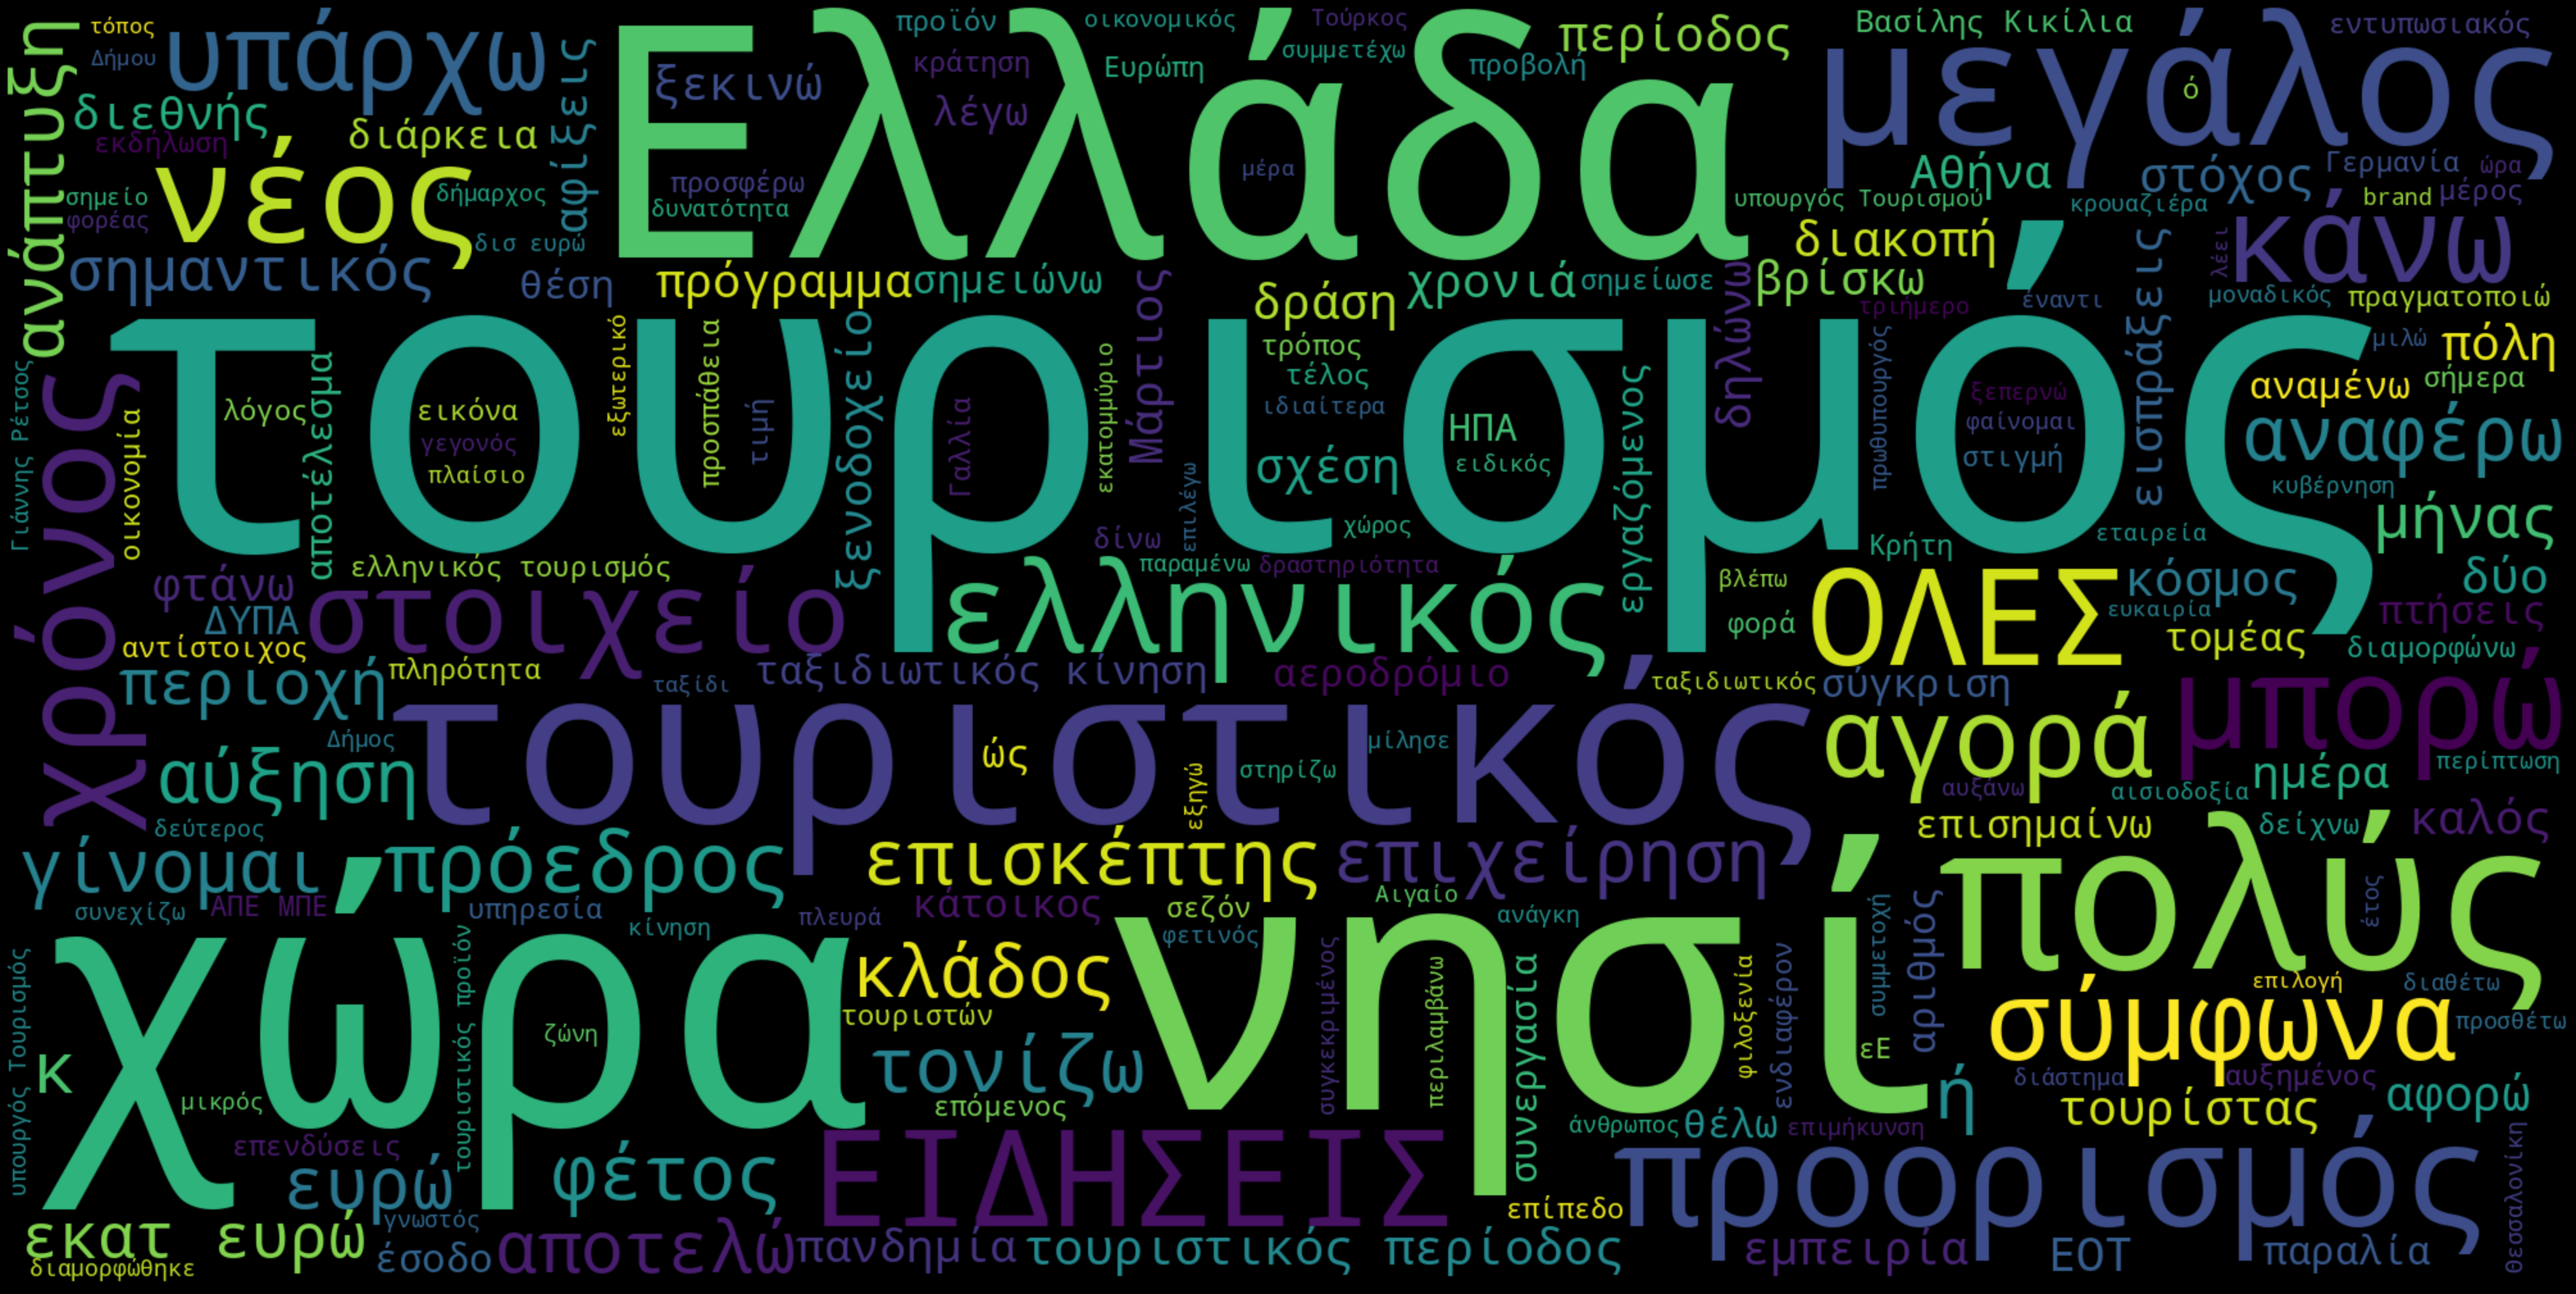

In [54]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
cv = CountVectorizer()

In [57]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [58]:
count_vector.shape

(100, 8413)

In [59]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  01  02  025  03  041  043  05  057  ...  ύφεση  ύφεσης  ύψη  ύψος  \
0   0    0   0   0    0   0    0    0   0    0  ...      0       0    0     0   
1   0    0   0   0    0   0    0    0   0    0  ...      0       0    0     0   
2   0    0   0   0    0   0    0    0   0    0  ...      0       0    0     0   
3   0    0   0   0    0   0    0    0   0    0  ...      0       0    1     0   
4   0    5   0   0    0   0    0    0   0    0  ...      0       0    0     0   

   ύψους  ύψωμα  ώρα  ώρας  ώρες  ώστε  
0      0      0    0     0     0     0  
1      0      0    1     0     0     0  
2      0      0    1     0     1     2  
3      0      0    0     0     0     2  
4      0      0    0     0     0     0  

[5 rows x 8413 columns]

In [60]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [61]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [62]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  01  02  025  03  041  043  05  057  ...  ύποπτες  ύφεση  ύφεσης  \
0   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
1   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
2   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
3   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
4   0    5   0   0    0   0    0    0   0    0  ...        0      0       0   

   ύψη  ύψος  ύψους  ύψωμα  ώρα  ώρας  ώρες  
0    0     0      0      0    0     0     0  
1    0     0      0      0    1     0     0  
2    0     0      0      0    1     0     1  
3    1     0      0      0    0     0     0  
4    0     0      0      0    0     0     0  

[5 rows x 8086 columns]

In [63]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [64]:
count_vector = cv.fit_transform(newsit_short_df['full_text'])

In [65]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  01  02  025  03  041  043  05  057  ...  ύποπτες  ύφεση  ύφεσης  \
0   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
1   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
2   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
3   0    0   0   0    0   0    0    0   0    0  ...        0      0       0   
4   0    5   0   0    0   0    0    0   0    0  ...        0      0       0   

   ύψη  ύψος  ύψους  ύψωμα  ώρα  ώρας  ώρες  
0    0     0      0      0    0     0     0  
1    0     0      0      0    1     0     0  
2    0     0      0      0    1     0     1  
3    1     0      0      0    0     0     0  
4    0     0      0      0    0     0     0  

[5 rows x 8084 columns]

In [66]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

2019  2022  2023  αύξηση  ειδησεις  εκατ  ελλάδα  ευρώ  κίνηση  κικίλιας  \
0     0     0     0       0         1     0       2     0       0         0   
1     0     0     0       0         1     0       0    10       0         0   
2     0     0     0       0         1     0       0     0       1         0   
3     0     0     0       1         1     0       0     2       3         0   
4     0     0     0       0         1     0       2     0       1         0   

   νησί  ολες  περίοδο  στοιχεία  σύμφωνα  τουρισμού  τουρισμό  τουρισμός  \
0     6     1        0         0        1          1         0          1   
1     0     1        0         0        0          0         0          0   
2     5     1        2         0        0          3         0          1   
3     2     1        0         1        1          3         1          1   
4     0     1        1         1        1          1         0          1   

   τουριστική  φέτος  
0           0      0  
1           0      1  
2           2      0  
3           2      1  
4           1      1

In [67]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέρνησής  κυβέρνηση  κυβέρνησης  κυβερνήσεων  κυβερνητικός  κυβοειδή
0           0          0           0            0             0         0
1           0          0           0            0             0         0
2           0          0           0            0             0         0
3           0          0           0            0             0         0
4           0          0           1            0             0         0

In [68]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

απε μπε  βασίλης κικίλιας  γιάννης ρέτσος  δισ ευρώ  εε 27  εκατ ευρώ  \
0        0                 0               0         0      0          0   
1        0                 0               0         0      0          0   
2        2                 0               0         0      0          0   
3        0                 0               0         0      0          0   
4        3                 0               0         0      0          0   

   επιμήκυνση τουριστικής  ζώνης ευρώ  κατοίκους χωρών  ολες ειδησεις  \
0                       0           0                0              1   
1                       0           0                0              1   
2                       1           0                0              1   
3                       0           0                0              1   
4                       0           0                0              1   

   σύμφωνα στοιχεία  ταξιδιωτική κίνηση  τουρισμού βασίλης  \
0                 0                   0                  0   
1                 0                   0                  0   
2                 0                   0                  0   
3                 1                   0                  0   
4                 1                   0                  0   

   τουριστική περίοδο  τουριστικής περιόδου  τουριστικού προϊόντος  \
0                   0                     0                      0   
1                   0                     0                      0   
2                   1                     1                      1   
3                   0                     0                      0   
4                   0                     0                      0   

   υπουργός τουρισμού  χιλ ταξιδιώτες  χωρών εε  χώρες εε  
0                   0               0         0         0  
1                   0               0         0         0  
2                   0               0         0         0  
3                   0               0         0         0  
4                   0               0         0         0

In [69]:
results.sum(axis =0).sort_values(ascending = False)

ολες ειδησεις             99
εκατ ευρώ                 58
βασίλης κικίλιας          42
υπουργός τουρισμού        39
εε 27                     37
ταξιδιωτική κίνηση        34
απε μπε                   29
τουριστικής περιόδου      28
τουρισμού βασίλης         26
χιλ ταξιδιώτες            24
χώρες εε                  21
κατοίκους χωρών           21
δισ ευρώ                  19
ζώνης ευρώ                18
γιάννης ρέτσος            18
σύμφωνα στοιχεία          17
τουριστική περίοδο        16
επιμήκυνση τουριστικής    16
τουριστικού προϊόντος     16
χωρών εε                  16
dtype: int64

In [70]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

ολες ειδησεις         99
εκατ ευρώ             58
βασίλης κικίλιας      42
υπουργός τουρισμού    39
εε 27                 37
dtype: int64

In [71]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['τουρισμός', 'Μύκονος', 'Σάμος', 'Σαντορίνη'])
count_vector = cv.fit_transform(newsit_short_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:1380: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


τουρισμός  Μύκονος  Σάμος  Σαντορίνη
0          1        0      0          0
1          0        0      0          0
2          1        0      0          0
3          1        0      0          0
4          1        0      0          0

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(newsit_short_df['full_text'])

In [74]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

000        10       100   11   12   13        15        16   17   18  \
0  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
1  0.000000  0.000000  0.077944  0.0  0.0  0.0  0.000000  0.077944  0.0  0.0   
2  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
3  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.093915  0.000000  0.0  0.0   
4  0.284791  0.151752  0.000000  0.0  0.0  0.0  0.062984  0.000000  0.0  0.0   

   ...    χρόνια     χρόνο     χωρών      χώρα  χώρας     χώρες  χώρο  ψηλά  \
0  ...  0.000000  0.000000  0.106603  0.000000    0.0  0.000000   0.0   0.0   
1  ...  0.000000  0.000000  0.000000  0.000000    0.0  0.000000   0.0   0.0   
2  ...  0.057309  0.000000  0.000000  0.000000    0.0  0.000000   0.0   0.0   
3  ...  0.000000  0.076628  0.000000  0.000000    0.0  0.000000   0.0   0.0   
4  ...  0.000000  0.000000  0.000000  0.049055    0.0  0.113916   0.0   0.0   

        ώρα      ώρες  
0  0.000000  0.000000  
1  0.080111  0.000000  
2  0.085780  0.094271  
3  0.000000  0.000000  
4  0.000000  0.000000  

[5 rows x 500 columns]

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements


cosine scores ==>  [[1.         0.00931091 0.18964053 0.09384713 0.16135706 0.18843362
  0.02476707 0.18249203 0.07823586 0.18935403 0.17120131 0.08544944
  0.06144155 0.59337995 0.06347595 0.19379875 0.01386079 0.04898661
  0.16392821 0.12170544 0.05977138 0.20787911 0.08728304 0.04460955
  0.06709583 0.02595568 0.2511957  0.31729031 0.04390205 0.11162654
  0.08381563 0.15551201 0.04887879 0.02689308 0.16364116 0.06209983
  0.05844651 0.05639615 0.02693441 0.06497423 0.14163506 0.01876955
  0.08969258 0.04431738 0.05410248 0.04574602 0.1265337  0.02874708
  0.05565567 0.03524837 0.06109854 0.15673564 0.05479817 0.0528309
  0.23950918 0.25786671 0.08581843 0.03210901 0.08793639 0.03157011
  0.2128184  0.11058966 0.12170629 0.03220536 0.09880405 0.06913742
  0.05602866 0.05824062 0.05319985 0.05814891 0.03321031 0.08439524
  0.03196994 0.08653617 0.09658297 0.08428991 0.09817557 0.03963473
  0.25356853 0.02738406 0.05537211 0.04950195 0.02367502 0.07864918
  0.06433995 0.12474295 0.2690

In [76]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

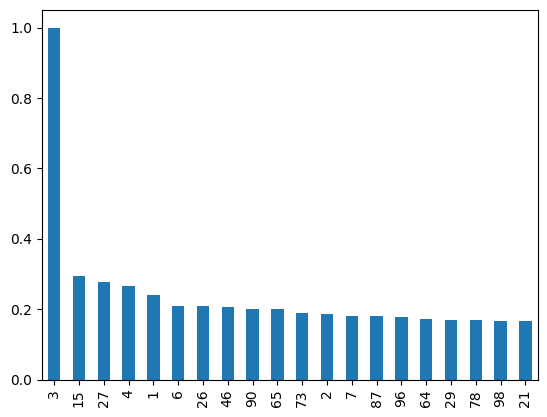

In [77]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [78]:
newsit_short_df['full_text'].loc[3]

'«Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα πρώτα στοιχεία που βλέπουν το φως της δημοσιότητας για την πορεία του τουρισμού, με τη φετινή χρονιά να αποδεικνύεται εξαιρετική για τον τουρισμό. Ο Κώστας Χρυσοχοΐδης, αντιπεριφερειάρχης Τουρισμού και Τουριστικής Ανάπτυξης Νοτίου Αιγαίου και ο δήμαρχος Παλαιού Φαλήρου, Γιάννης Φωστηρόπουλος, μίλησαν στο Mega για την τουριστική κίνηση στα νησιά και τις τιμές στις ξαπλώστρες.  Άλλοι για Κρήτη, άλλοι για Ρόδο και άλλοι κοιτάνε οποιοδήποτε νησί με τα… κιάλια, καθώς τα ακτοπλοϊκά εισιτήρια έχουν αυξηθεί πολύ και οι τιμές βρίσκονται στα ύψη. Η κίνηση στο λιμάνι του Πειραιά είναι αυξημένη, ενώ πολλοί είναι αυτοί που θα πάνε διακοπές μόνο 4 με 5 ημέρες, ενώ όσοι μείνουν για περισσότερες μέρες έχουν επιλέξει το σπίτι συγγενή και όχι κάποιο κατάλυμα.  Οι περισσότεροι δεν θα πάρουν αυτοκίνητο ώστε να μην αυξηθούν τα έξοδά τους, ενώ θα επιλέξουν να νοικιάσουν για μία μέρα μόνο αυτοκίνητο ώστε να «γυρίσουν» το νησί.  \xa0 Πολλοί είναι εκείνοι όμως, πο

In [79]:
newsit_short_df['full_text'].loc[0]

'Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τουριστών και μεγάλη ταξιδιωτική ιστοσελίδα βάζει το νησί στις 5 κορυφαίες επιλόγές για το φετινό καλοκαίρι… Στους πέντε κορυφαίους περιπατητικούς προορισμούς της Ελλάδας εντάσσεται η Σάμος, σύμφωνα με το νέο κατάλογο που ανακοίνωσε το Griekenland.net. Ο τουρισμός συνεχίζεται, οι αφίξεις στο νησί αυξάνονται και η αισιοδοξία για το επόμενο διάστημα είναι διάχυτη στο νησί.  Καταγράφοντας τις απόψεις των Ολλανδών ταξιδιωτών, η καθιερωμένη ταξιδιωτική ιστοσελίδα με εκατομμύρια επισκέπτες ανέδειξε τη Σάμο στη δεύτερη θέση σε όλη την Ελλάδα και μάλιστα ως τον κορυφαίο νησιωτικό προορισμό με κριτήριο τις περιπατητικές διαστηριότητες και τις ταξιδιωτικές εμπειρίες που προσφέρει το μαγευτικό νησί του Βορείου Αιγαίου. Προηγήθηκε ενημερωτική επαφή του Δήμου Ανατολικής Σάμου με τη δημοσιογραφική ομάδα του μέσου. «Μετά την αστάθεια που εμφάνισε η Ελλάδα τον Ιούνιο, οι προβλέψεις για τον Ιούλιο και τον Αύγουστο είναι ευοίωνες για το νησί του Πυθαγόρα.  Η

In [80]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

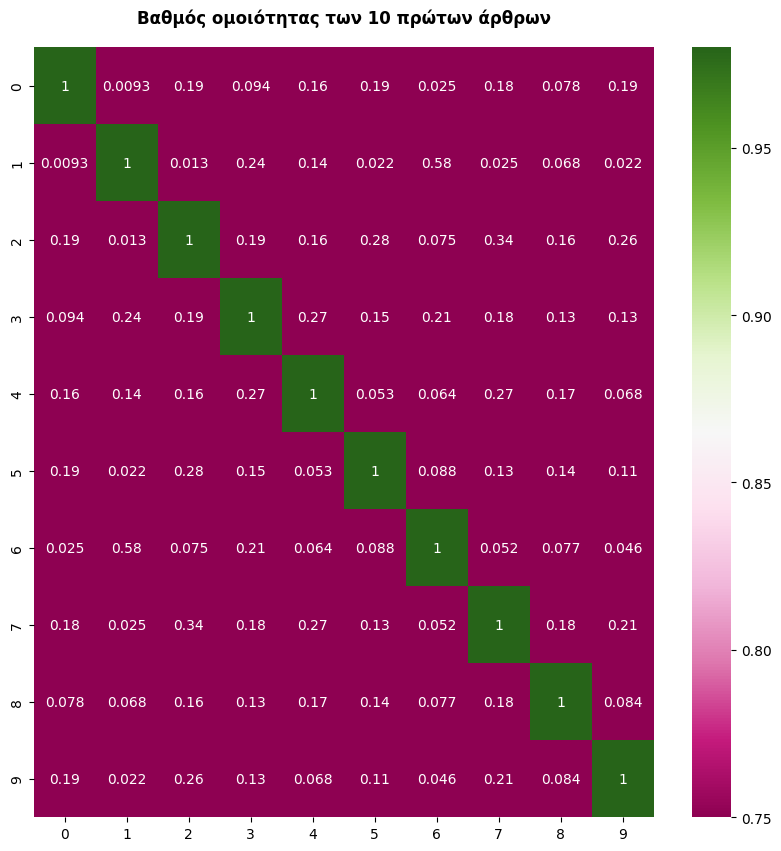

In [81]:
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")


In [82]:
#!python -m spacy download el_core_news_sm

In [83]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


In [84]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [85]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [86]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [87]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [88]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [89]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [90]:
!python -m spacy download el_core_news_sm

2023-07-12 12:48:42.678660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.5.0/el_core_news_sm-3.5.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [91]:
nlp = spacy.load('el_core_news_sm')


In [92]:
len(newsit_full_articles_df)

100

In [93]:
newsit_short_df = newsit_full_articles_df[['date','full_text' ]]
newsit_short_df = newsit_short_df.rename(columns={'full_text': 'text'} )

In [95]:
newsit_short_df.head()

date  \
0  2023-07-10T09:09:03+03:00   
1  2023-07-09T20:30:07+03:00   
2  2023-07-09T13:20:41+03:00   
3  2023-07-09T09:48:30+03:00   
4  2023-07-08T16:38:30+03:00   

                                                text  
0  Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...  
1  Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...  
2  Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...  
3  «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...  
4  Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...

In [96]:
emolex_df['word'].head(5)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
Name: word, dtype: object

In [97]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [99]:
matrix = vec.fit_transform(newsit_short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [100]:
wordcount_df.shape

(100, 13161)

In [101]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [102]:
wordcount_df[joy_words].sum(axis=1)

0      3
1      2
2      9
3     10
4     12
      ..
95     0
96    13
97     0
98     4
99     1
Length: 100, dtype: int64

In [106]:
cnt = 0
for i in wordcount_df[joy_words].sum(axis=1):
  cnt+=i
print(cnt)

409


In [107]:
newsit_short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

newsit_short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

newsit_short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

newsit_short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

newsit_short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

newsit_short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

newsit_short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

newsit_short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

newsit_short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

newsit_short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [109]:
newsit_short_df

date  \
0   2023-07-10T09:09:03+03:00   
1   2023-07-09T20:30:07+03:00   
2   2023-07-09T13:20:41+03:00   
3   2023-07-09T09:48:30+03:00   
4   2023-07-08T16:38:30+03:00   
..                        ...   
95  2022-12-21T15:39:07+02:00   
96  2022-12-20T18:27:16+02:00   
97  2022-12-20T16:51:11+02:00   
98  2022-12-16T13:20:29+02:00   
99  2022-12-09T16:56:20+02:00   

                                                 text  anger  positive  joy  \
0   Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...      1         6    3   
1   Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...      3         7    2   
2   Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...      5        20    9   
3   «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...      3        14   10   
4   Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...      6        24   12   
..                                                ...    ...       ...  ...   
95  Ο τουρισμός αποτελεί ένα σημαντικό κομμάτι της...      0         0    0   
96  Ο Κυριάκος Μητσοτάκης μίλησε στην εκδήλωση που...     11        33   13   
97  Τα στοιχεία της ΕΛΣΤΑΤ σχολίασε με ανάρτησή το...      0         0    0   
98  Σε πρωταγωνιστή της ανάπτυξης θα αναδειχθεί κα...      7        12    4   
99  «Ο Τουρισμός παίρνει τα εύσημα από την ελληνικ...      1         5    1   

    disgust  surprise  trust  anticipation  sadness  negative  fear  
0         1         2      5             3        0         3     2  
1         1         1      5             4        3         4     5  
2         4         4      5             8        5        12     5  
3         4         2      8             8        1         9     0  
4         2         7     12            14        1         6     3  
..      ...       ...    ...           ...      ...       ...   ...  
95        0         0      2             1        0         1     0  
96       12         7     21            11       10        32    14  
97        0         0      0             1        0         0     0  
98        6         4     16             4        6         9     7  
99        0         0      7             3        1         3     3  

[100 rows x 12 columns]

In [110]:
newsit_short_df.reset_index(inplace=True)
newsit_short_df.set_index('date', inplace=True)
newsit_short_df

index  \
date                               
2023-07-10T09:09:03+03:00      0   
2023-07-09T20:30:07+03:00      1   
2023-07-09T13:20:41+03:00      2   
2023-07-09T09:48:30+03:00      3   
2023-07-08T16:38:30+03:00      4   
...                          ...   
2022-12-21T15:39:07+02:00     95   
2022-12-20T18:27:16+02:00     96   
2022-12-20T16:51:11+02:00     97   
2022-12-16T13:20:29+02:00     98   
2022-12-09T16:56:20+02:00     99   

                                                                        text  \
date                                                                           
2023-07-10T09:09:03+03:00  Η Σάμος πρωταγωνιστεί στις επιλογές Ολλανδών τ...   
2023-07-09T20:30:07+03:00  Τα ακτοπλοϊκά εισιτήρια είναι «φωτιά» και όπως...   
2023-07-09T13:20:41+03:00  Η Τήνος δίνει τη δική της μάχη και ο τουρισμός...   
2023-07-09T09:48:30+03:00  «Βουλιάζουν» από κόσμο τα νησιά σύμφωνα με τα ...   
2023-07-08T16:38:30+03:00  Ο τουρισμός δίνει ανάσες στις τοπικές αγορές μ...   
...                                                                      ...   
2022-12-21T15:39:07+02:00  Ο τουρισμός αποτελεί ένα σημαντικό κομμάτι της...   
2022-12-20T18:27:16+02:00  Ο Κυριάκος Μητσοτάκης μίλησε στην εκδήλωση που...   
2022-12-20T16:51:11+02:00  Τα στοιχεία της ΕΛΣΤΑΤ σχολίασε με ανάρτησή το...   
2022-12-16T13:20:29+02:00  Σε πρωταγωνιστή της ανάπτυξης θα αναδειχθεί κα...   
2022-12-09T16:56:20+02:00  «Ο Τουρισμός παίρνει τα εύσημα από την ελληνικ...   

                           anger  positive  joy  disgust  surprise  trust  \
date                                                                        
2023-07-10T09:09:03+03:00      1         6    3        1         2      5   
2023-07-09T20:30:07+03:00      3         7    2        1         1      5   
2023-07-09T13:20:41+03:00      5        20    9        4         4      5   
2023-07-09T09:48:30+03:00      3        14   10        4         2      8   
2023-07-08T16:38:30+03:00      6        24   12        2         7     12   
...                          ...       ...  ...      ...       ...    ...   
2022-12-21T15:39:07+02:00      0         0    0        0         0      2   
2022-12-20T18:27:16+02:00     11        33   13       12         7     21   
2022-12-20T16:51:11+02:00      0         0    0        0         0      0   
2022-12-16T13:20:29+02:00      7        12    4        6         4     16   
2022-12-09T16:56:20+02:00      1         5    1        0         0      7   

                           anticipation  sadness  negative  fear  
date                                                              
2023-07-10T09:09:03+03:00             3        0         3     2  
2023-07-09T20:30:07+03:00             4        3         4     5  
2023-07-09T13:20:41+03:00             8        5        12     5  
2023-07-09T09:48:30+03:00             8        1         9     0  
2023-07-08T16:38:30+03:00            14        1         6     3  
...                                 ...      ...       ...   ...  
2022-12-21T15:39:07+02:00             1        0         1     0  
2022-12-20T18:27:16+02:00            11       10        32    14  
2022-12-20T16:51:11+02:00             1        0         0     0  
2022-12-16T13:20:29+02:00             4        6         9     7  
2022-12-09T16:56:20+02:00             3        1         3     3  

[100 rows x 12 columns]

In [134]:
newsit_short_df.index

Index(['2023-07-10T09:09:03+03:00', '2023-07-09T20:30:07+03:00',
       '2023-07-09T13:20:41+03:00', '2023-07-09T09:48:30+03:00',
       '2023-07-08T16:38:30+03:00', '2023-07-05T08:43:48+03:00',
       '2023-07-01T17:59:40+03:00', '2023-07-01T13:43:49+03:00',
       '2023-06-30T12:32:27+03:00', '2023-06-29T10:40:53+03:00',
       '2023-06-28T12:38:40+03:00', '2023-06-21T18:32:41+03:00',
       '2023-06-21T15:33:02+03:00', '2023-06-19T09:12:41+03:00',
       '2023-06-18T16:22:41+03:00', '2023-06-17T16:14:29+03:00',
       '2023-06-14T11:21:33+03:00', '2023-06-14T11:18:27+03:00',
       '2023-06-14T11:00:28+03:00', '2023-06-06T08:48:17+03:00',
       '2023-06-05T11:22:18+03:00', '2023-06-04T14:19:45+03:00',
       '2023-06-02T10:15:00+03:00', '2023-05-29T06:45:17+03:00',
       '2023-05-23T14:41:41+03:00', '2023-05-23T10:27:05+03:00',
       '2023-05-23T10:23:40+03:00', '2023-05-19T11:38:57+03:00',
       '2023-05-18T06:47:42+03:00', '2023-05-17T10:23:14+03:00',
       '2023-05-16T11:40:

παιρνουμε τη μαλακια το στρινγκ οππυ εχουμε για ντειτ το μετατρεπουμε σε στρινγκ το οποιο μπορει να γινει ντειταιμ της μορφης '
%Y-%m-%d %H:%M'

In [158]:
ac_date =[]
for i in newsit_short_df.index:
  x = i.replace('T'," ")
  x = x[:19]
  ac_date.append(x)
newsit_short_df.index = ac_date

newsit_short_df.index

Index(['2023-07-10 09:09:03', '2023-07-09 20:30:07', '2023-07-09 13:20:41',
       '2023-07-09 09:48:30', '2023-07-08 16:38:30', '2023-07-05 08:43:48',
       '2023-07-01 17:59:40', '2023-07-01 13:43:49', '2023-06-30 12:32:27',
       '2023-06-29 10:40:53', '2023-06-28 12:38:40', '2023-06-21 18:32:41',
       '2023-06-21 15:33:02', '2023-06-19 09:12:41', '2023-06-18 16:22:41',
       '2023-06-17 16:14:29', '2023-06-14 11:21:33', '2023-06-14 11:18:27',
       '2023-06-14 11:00:28', '2023-06-06 08:48:17', '2023-06-05 11:22:18',
       '2023-06-04 14:19:45', '2023-06-02 10:15:00', '2023-05-29 06:45:17',
       '2023-05-23 14:41:41', '2023-05-23 10:27:05', '2023-05-23 10:23:40',
       '2023-05-19 11:38:57', '2023-05-18 06:47:42', '2023-05-17 10:23:14',
       '2023-05-16 11:40:52', '2023-05-11 15:29:47', '2023-05-04 14:00:04',
       '2023-05-03 12:03:27', '2023-04-29 20:00:27', '2023-04-28 12:23:05',
       '2023-04-26 13:33:04', '2023-04-26 12:35:11', '2023-04-22 08:21:39',
       '2023

In [161]:
newsit_short_df.index = pd.to_datetime(newsit_short_df.index, format='%Y-%m-%d %H:%M')

<Axes: >

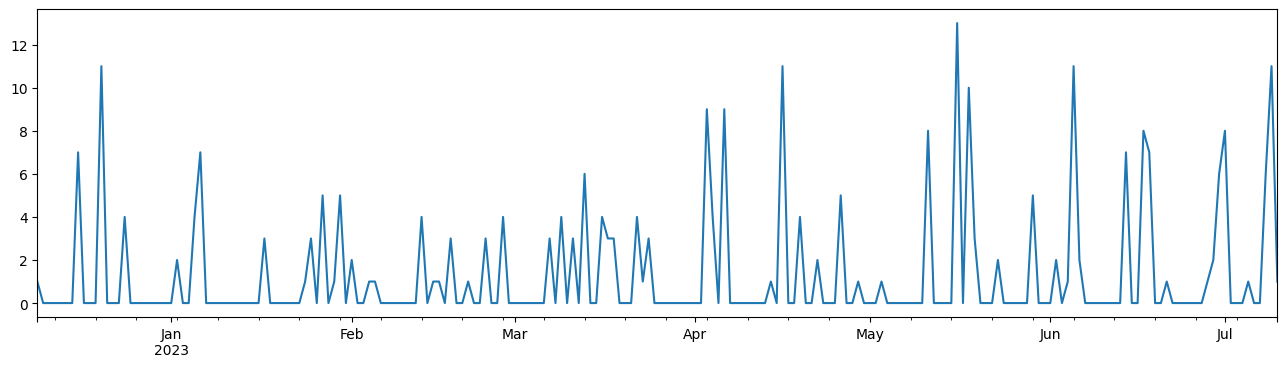

In [162]:
newsit_short_df['anger'].resample('D').sum().plot(figsize=(16,4))

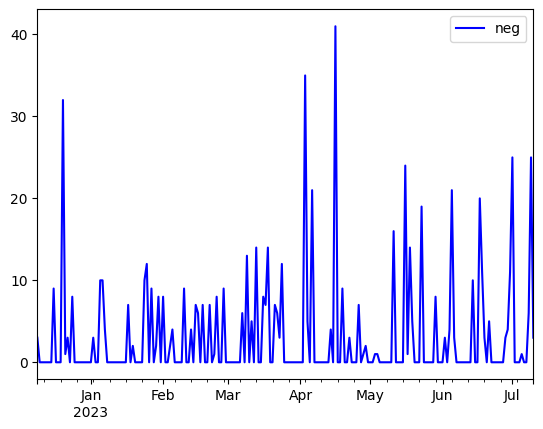

In [163]:
newsit_short_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

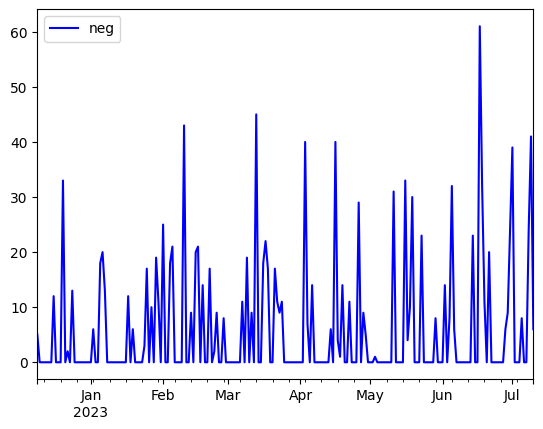

In [186]:
newsit_short_df['positive'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: >

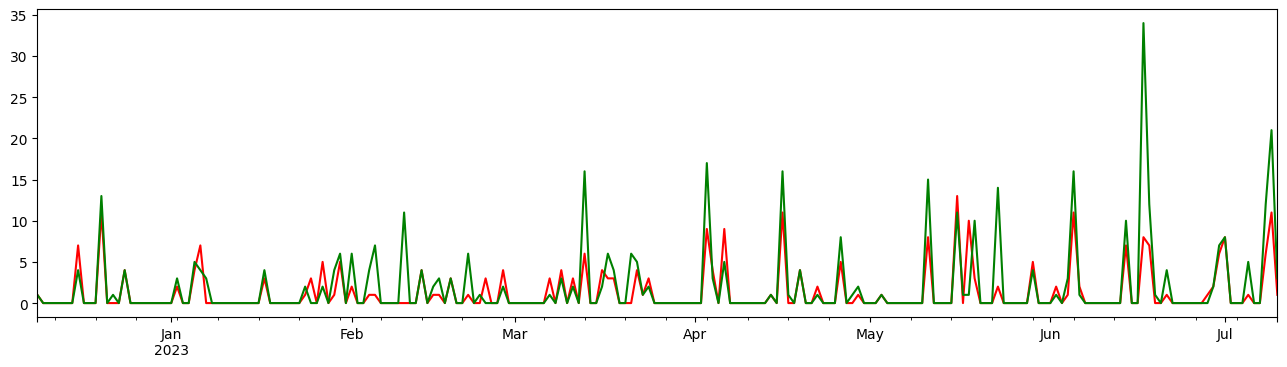

In [169]:
ax = newsit_short_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
newsit_short_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: >

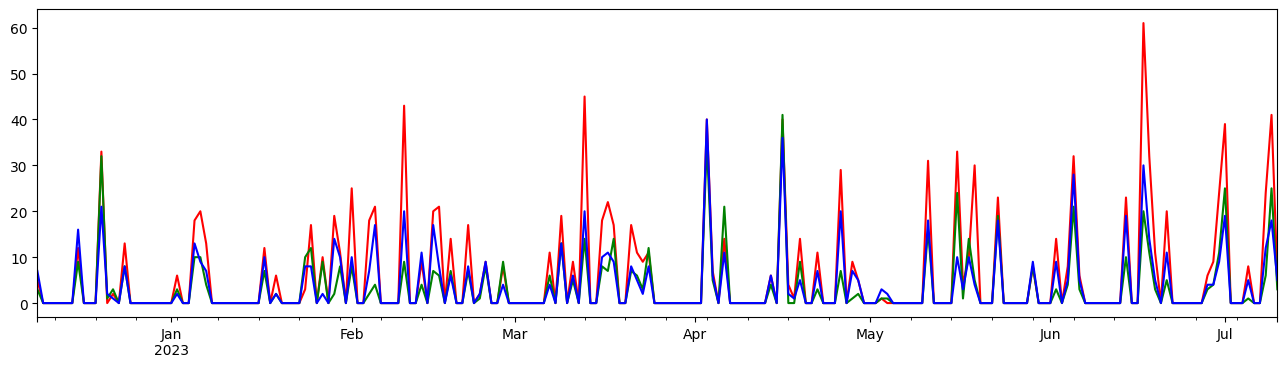

In [170]:
ax = newsit_short_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
newsit_short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
newsit_short_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

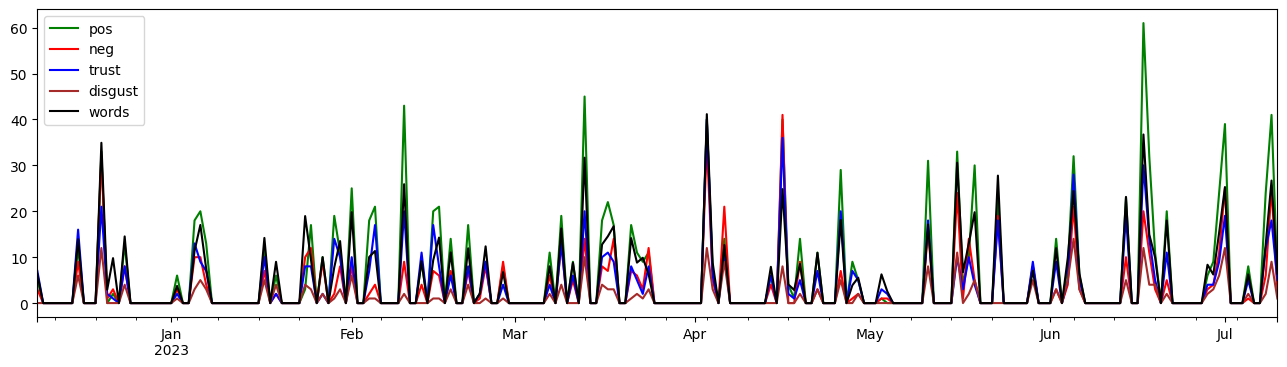

In [191]:
ax = newsit_short_df['positive'].resample('D').sum().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
newsit_short_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
newsit_short_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
newsit_short_df['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(newsit_short_df['text'].str.len().resample('D').sum()/300).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: >

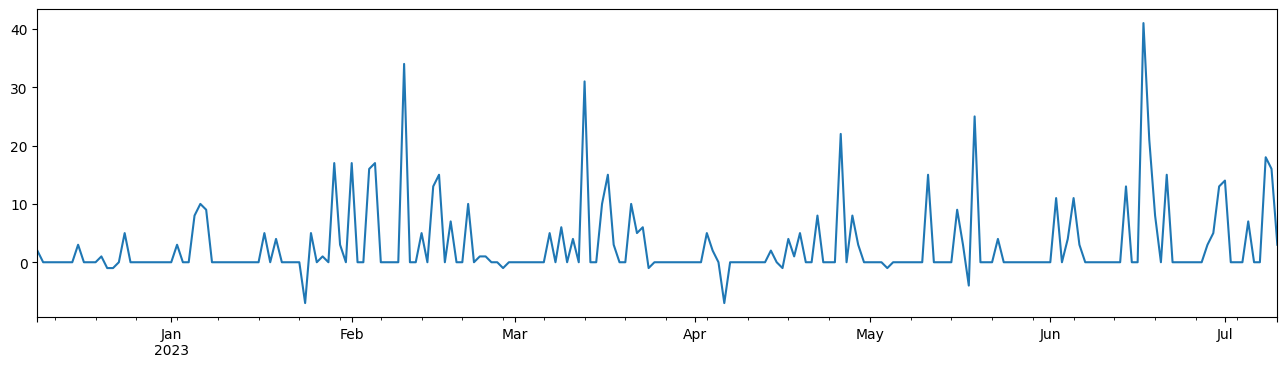

In [192]:
newsit_short_df['pos/neg'] = newsit_short_df['positive'] - newsit_short_df['negative']
newsit_short_df['pos/neg'].resample('D').sum().plot(figsize=(16,4))

In [201]:
newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] = newsit_short_df.positive*100//newsit_short_df[['positive','negative']].sum(
        axis=1) - newsit_short_df.negative*100//newsit_short_df[['positive','negative']].sum(axis=1)
newsit_short_df[(newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] == newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'] == newsit_short_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive  negative  \
2023-06-21 15:33:02     12         0         1   
2023-06-14 11:18:27     17         2         0   
2023-05-23 14:41:41     24         0         1   
2023-05-04 14:00:04     32         0         1   
2023-04-26 12:35:11     37         7         0   
2023-04-18 19:40:17     41         1         0   
2023-04-17 13:00:05     42         4         0   
2022-12-21 15:39:07     95         0         1   

                     (-)αρνητικότητα | θετικότητα(+)  
2023-06-21 15:33:02                           -100.0  
2023-06-14 11:18:27                            100.0  
2023-05-23 14:41:41                           -100.0  
2023-05-04 14:00:04                           -100.0  
2023-04-26 12:35:11                            100.0  
2023-04-18 19:40:17                            100.0  
2023-04-17 13:00:05                            100.0  
2022-12-21 15:39:07                           -100.0

In [203]:
newsit_short_df['(+)εμπιστοσύνη | αποστροφή(-)'] = newsit_short_df.positive*100//newsit_short_df[['trust','disgust']].sum(
        axis=1) - newsit_short_df.negative*100//newsit_short_df[['trust','disgust']].sum(axis=1)

<Axes: >

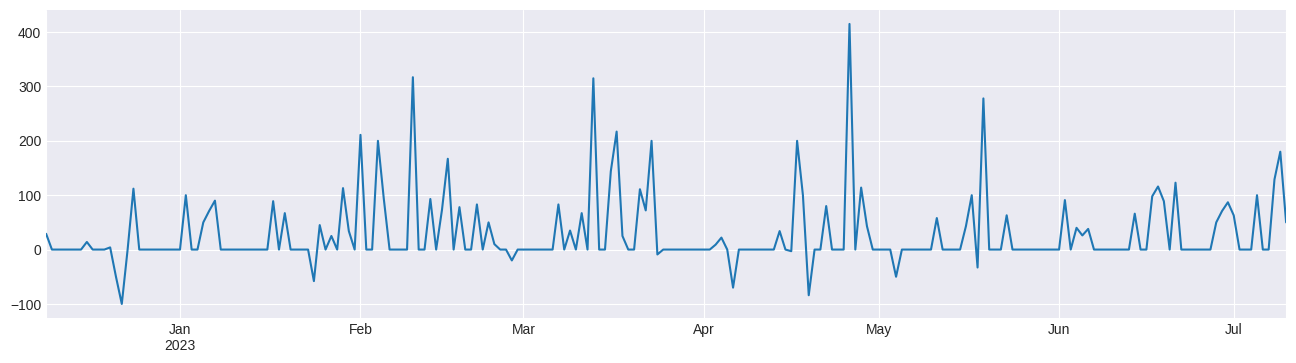

In [205]:
newsit_short_df['(+)εμπιστοσύνη | αποστροφή(-)'].resample('D').sum().plot(figsize=(16,4))